In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from glob import glob
import tensorflow as tf
import cv2
import keras.backend as K
# important important deep learning Library
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.optimizers import Adam

In [2]:
pic_size= 48
folder_path = "C:/Users/TheLegend/Emotion Detection CNN/images/images/"

In [3]:
#define paths
angry_path = r'C:\Users\TheLegend\Emotion Detection CNN\images\images\train\angry'
disgust_path = r'C:\Users\TheLegend\Emotion Detection CNN\images\images\train\disgust'
fear_path=r'C:\Users\TheLegend\Emotion Detection CNN\images\images\train\fear'
happy_path=r'C:\Users\TheLegend\Emotion Detection CNN\images\images\train\happy'
neutral_path= r'C:\Users\TheLegend\Emotion Detection CNN\images\images\train\neutral'
sad_path=r'C:\Users\TheLegend\Emotion Detection CNN\images\images\train\sad'
surprise_path=r'C:\Users\TheLegend\Emotion Detection CNN\images\images\train\surprise'

# Use glob to grab images from path .jpg or jpeg
angry_files = glob(angry_path + '/*')
disgust_files = glob(disgust_path + '/*')
fear_files= glob(fear_path + '/*')
happy_files= glob(happy_path + '/*')
neutral_files= glob(neutral_path + '/*')
sad_files= glob(sad_path + '/*')
surprise_files= glob(surprise_path + '/*')


In [4]:
# Visualize file variable contents
print("Total Count of angry train images: ",len(angry_files))
print("_________________________________________________________________________________________________________________________")
print("Total Count of disgust train images: ",len(disgust_files))
print("_________________________________________________________________________________________________________________________")
print("Total Count of fear train images: ",len(fear_files))
print("_________________________________________________________________________________________________________________________")
print("Total Count of happy train images: ",len(happy_files))
print("_________________________________________________________________________________________________________________________")
print("Total Count of neutral train images: ",len(neutral_files))
print("_________________________________________________________________________________________________________________________")
print("Total Count of sad train images: ",len(sad_files))
print("_________________________________________________________________________________________________________________________")
print("Total Count of surprise train images: ",len(surprise_files))

Total Count of angry train images:  3799
_________________________________________________________________________________________________________________________
Total Count of disgust train images:  435
_________________________________________________________________________________________________________________________
Total Count of fear train images:  4021
_________________________________________________________________________________________________________________________
Total Count of happy train images:  6299
_________________________________________________________________________________________________________________________
Total Count of neutral train images:  4947
_________________________________________________________________________________________________________________________
Total Count of sad train images:  4957
_________________________________________________________________________________________________________________________
Total Count of surpris

In [5]:
angry_labels = []                                    
disgust_labels = []
fear_labels = []
happy_labels = []
neutral_labels = []
sad_labels = []
surprise_labels = []

                                    
angry_images = []                                   
disgust_images = []
fear_images = []
happy_images = []
neutral_images = []
sad_images = []
surprise_images = []

for i in range(len(angry_files)):
  image = cv2.imread(angry_files[i])                 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
  image = cv2.resize(image,(48,48))                 
  angry_images.append(image)                         
  angry_labels.append('angry')                     
 
for i in range(len(disgust_files)):
  image = cv2.imread(disgust_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  disgust_images.append(image)
  disgust_labels.append('disgust')

for i in range(len(fear_files)):
  image = cv2.imread(fear_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  fear_images.append(image)
  fear_labels.append('fear')

for i in range(len(happy_files)):
  image = cv2.imread(happy_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  happy_images.append(image)
  happy_labels.append('happy')


for i in range(len(neutral_files)):
  image = cv2.imread(neutral_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  neutral_images.append(image)
  neutral_labels.append('neutral')

for i in range(len(sad_files)):
  image = cv2.imread(sad_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  sad_images.append(image)
  sad_labels.append('sad')


for i in range(len(surprise_files)):
  image = cv2.imread(surprise_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(48,48))
  surprise_images.append(image)
  surprise_labels.append('surprise')





In [6]:
def plot_images_from_datasets(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()


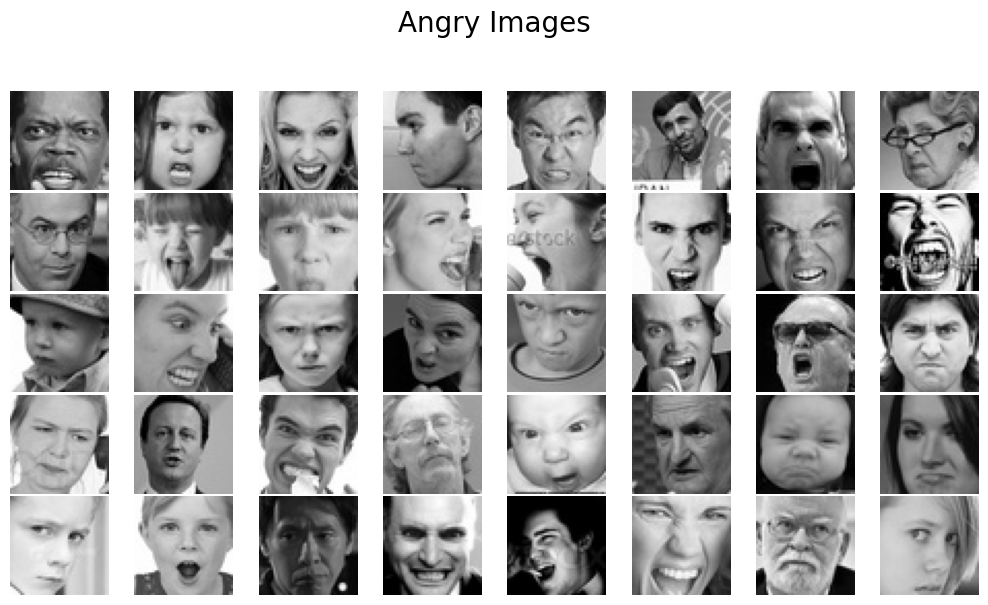

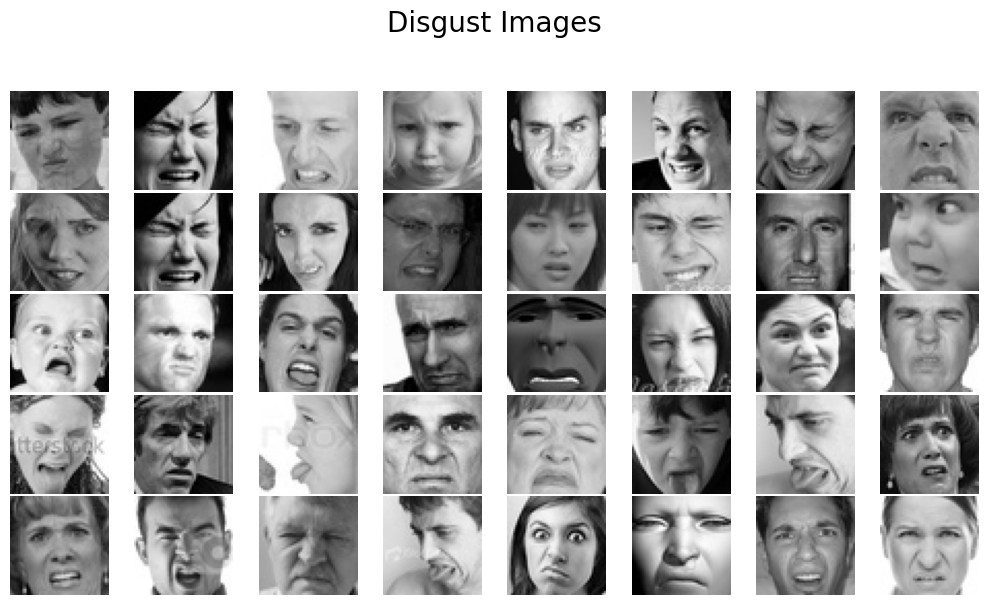

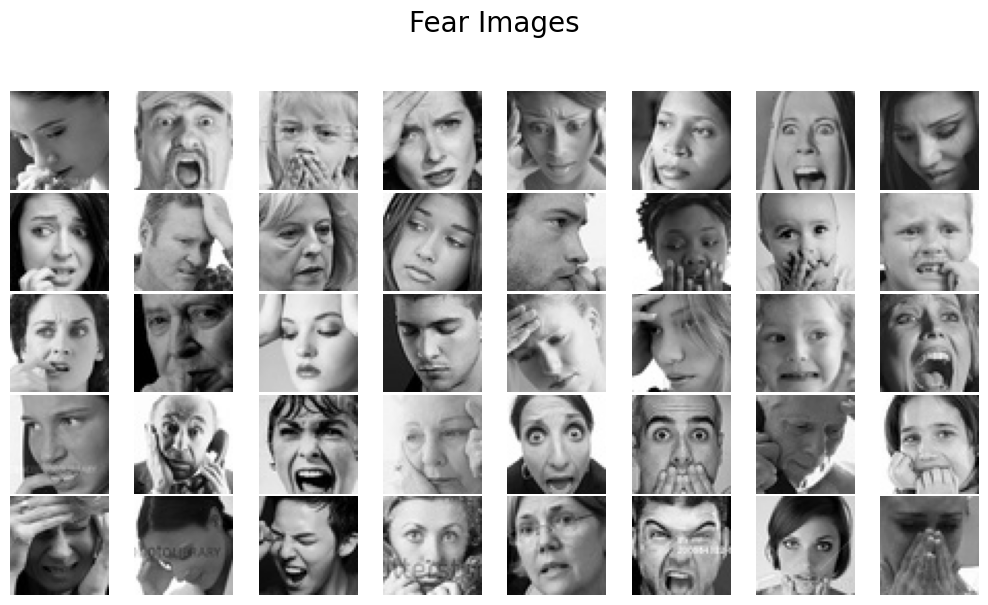

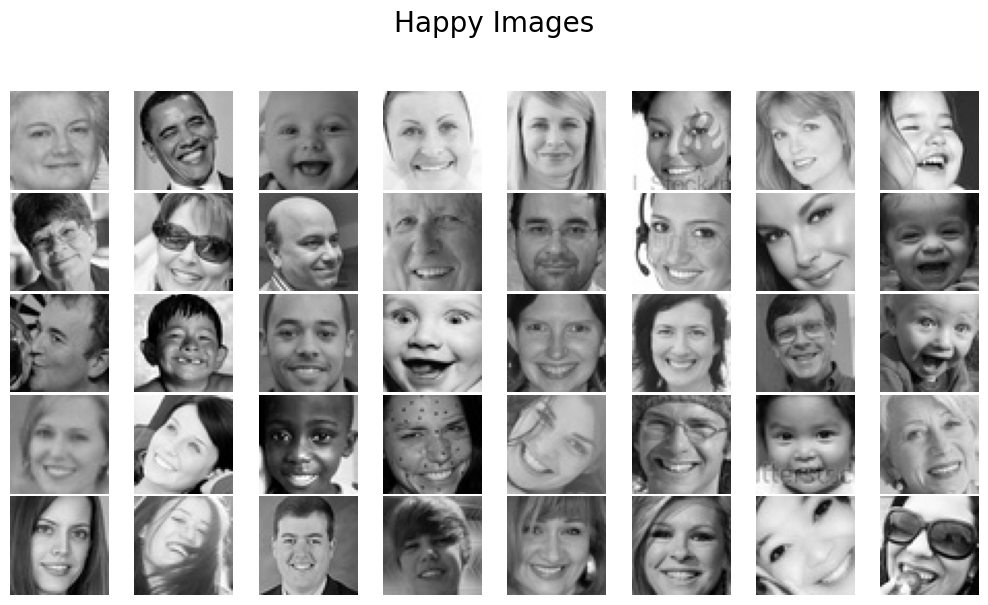

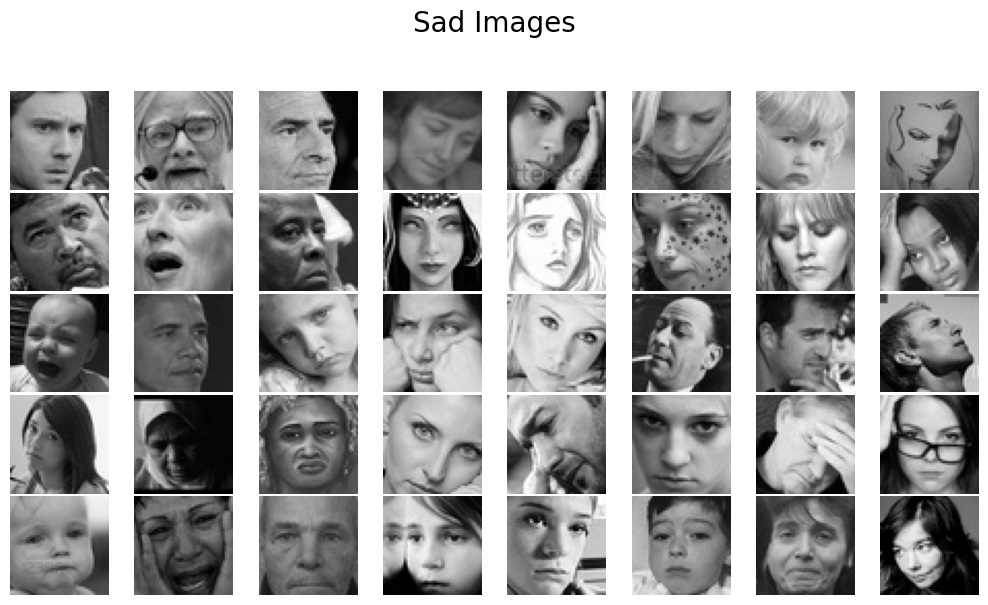

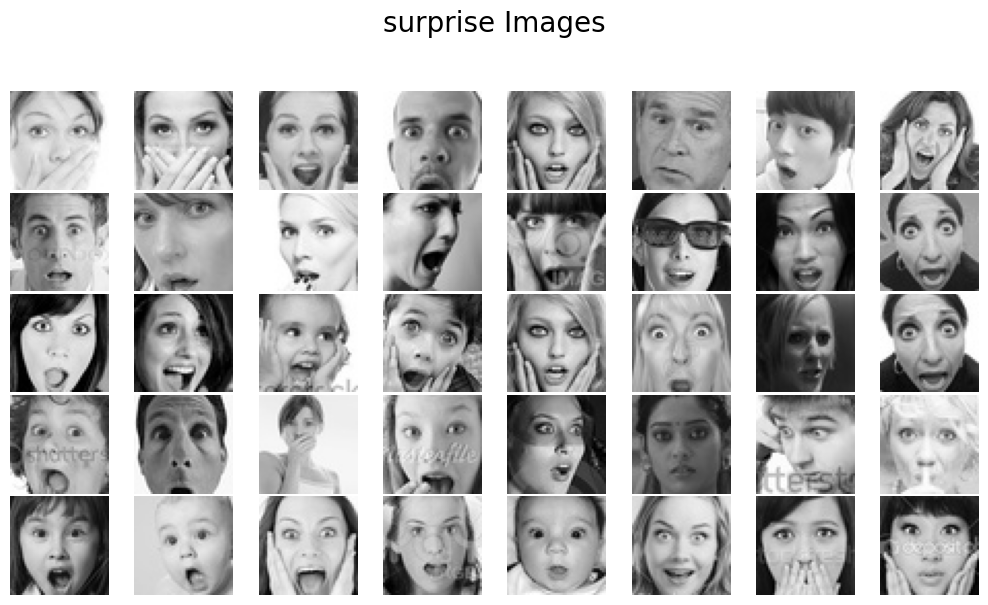

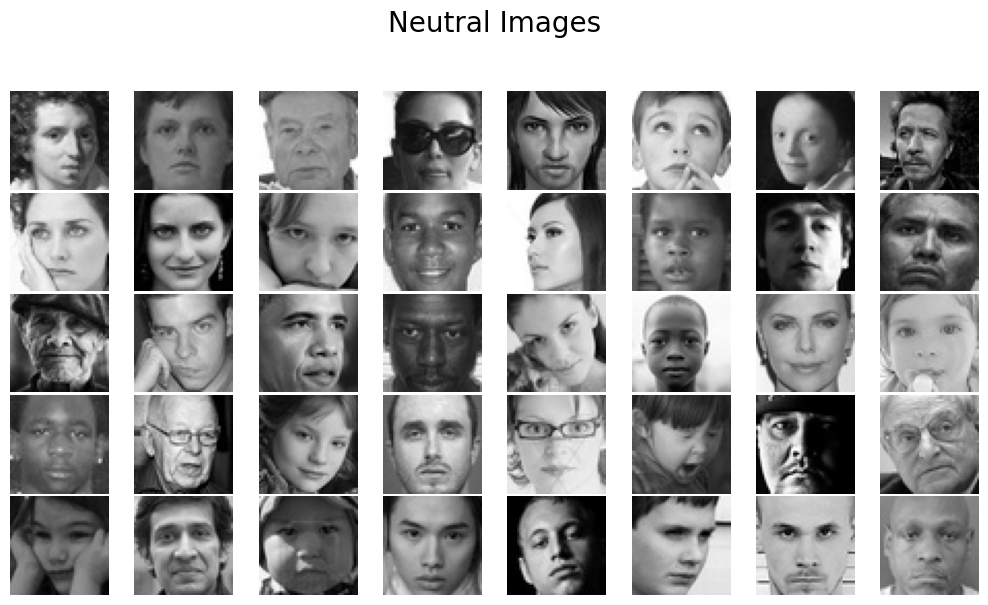

In [7]:
plot_images_from_datasets(angry_images, 'Angry Images')
plot_images_from_datasets(disgust_images, 'Disgust Images')
plot_images_from_datasets(fear_images, 'Fear Images')
plot_images_from_datasets(happy_images, 'Happy Images')
plot_images_from_datasets(sad_images, 'Sad Images')
plot_images_from_datasets(surprise_images, 'surprise Images')
plot_images_from_datasets(neutral_images, 'Neutral Images')

# Convert to array and Normalize to interval
angry_images = np.array(angry_images) / 255
disgust_images = np.array(disgust_images) / 255
fear_images = np.array(fear_images) / 255
happy_images = np.array(happy_images) / 255
sad_images = np.array(sad_images) / 255
surprise_images = np.array(surprise_images) / 255
neutral_images = np.array(neutral_images) / 255



In [8]:
batch_size=32

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


val_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 27658 images belonging to 7 classes.
Found 6714 images belonging to 7 classes.


In [9]:
no_of_classes = 7

model = Sequential()


model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(no_of_classes, activation='softmax'))
opt = Adam(learning_rate=1e-4)




In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [11]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [12]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [13]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=METRICS)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
epochs = 50

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

Reduce_LearningRate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)


callbacks_list = [early_stopping,checkpoint,Reduce_LearningRate]



In [16]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = val_set,
                                validation_steps = val_set.n//val_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50


C:\Users\TheLegend\AppData\Local\Temp\ipykernel_16044\3268437950.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


864/864 [==============================] - 391s 449ms/step - loss: 2.0221 - accuracy: 0.8442 - precision: 0.2610 - recall: 0.0495 - auc: 0.6298 - f1_score: 0.0821 - val_loss: 1.7812 - val_accuracy: 0.8571 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6809 - val_f1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/50
864/864 [==============================] - 386s 447ms/step - loss: 1.8482 - accuracy: 0.8517 - precision: 0.4105 - recall: 0.0873 - auc: 0.6870 - f1_score: 0.1407 - val_loss: 1.6404 - val_accuracy: 0.8643 - val_precision: 0.6840 - val_recall: 0.0926 - val_auc: 0.7459 - val_f1_score: 0.1356 - lr: 1.0000e-04
Epoch 3/50
864/864 [==============================] - 387s 448ms/step - loss: 1.7025 - accuracy: 0.8605 - precision: 0.5433 - recall: 0.1469 - auc: 0.7373 - f1_score: 0.2286 - val_loss: 1.5710 - val_accuracy: 0.8696 - val_precision: 0.7899 - val_recall: 0.1192 - val_auc: 0.7712 - val_f1_score: 0.1731 - lr: 1.0000e-04
Epoch 4/50
864/864 [======================

In [17]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

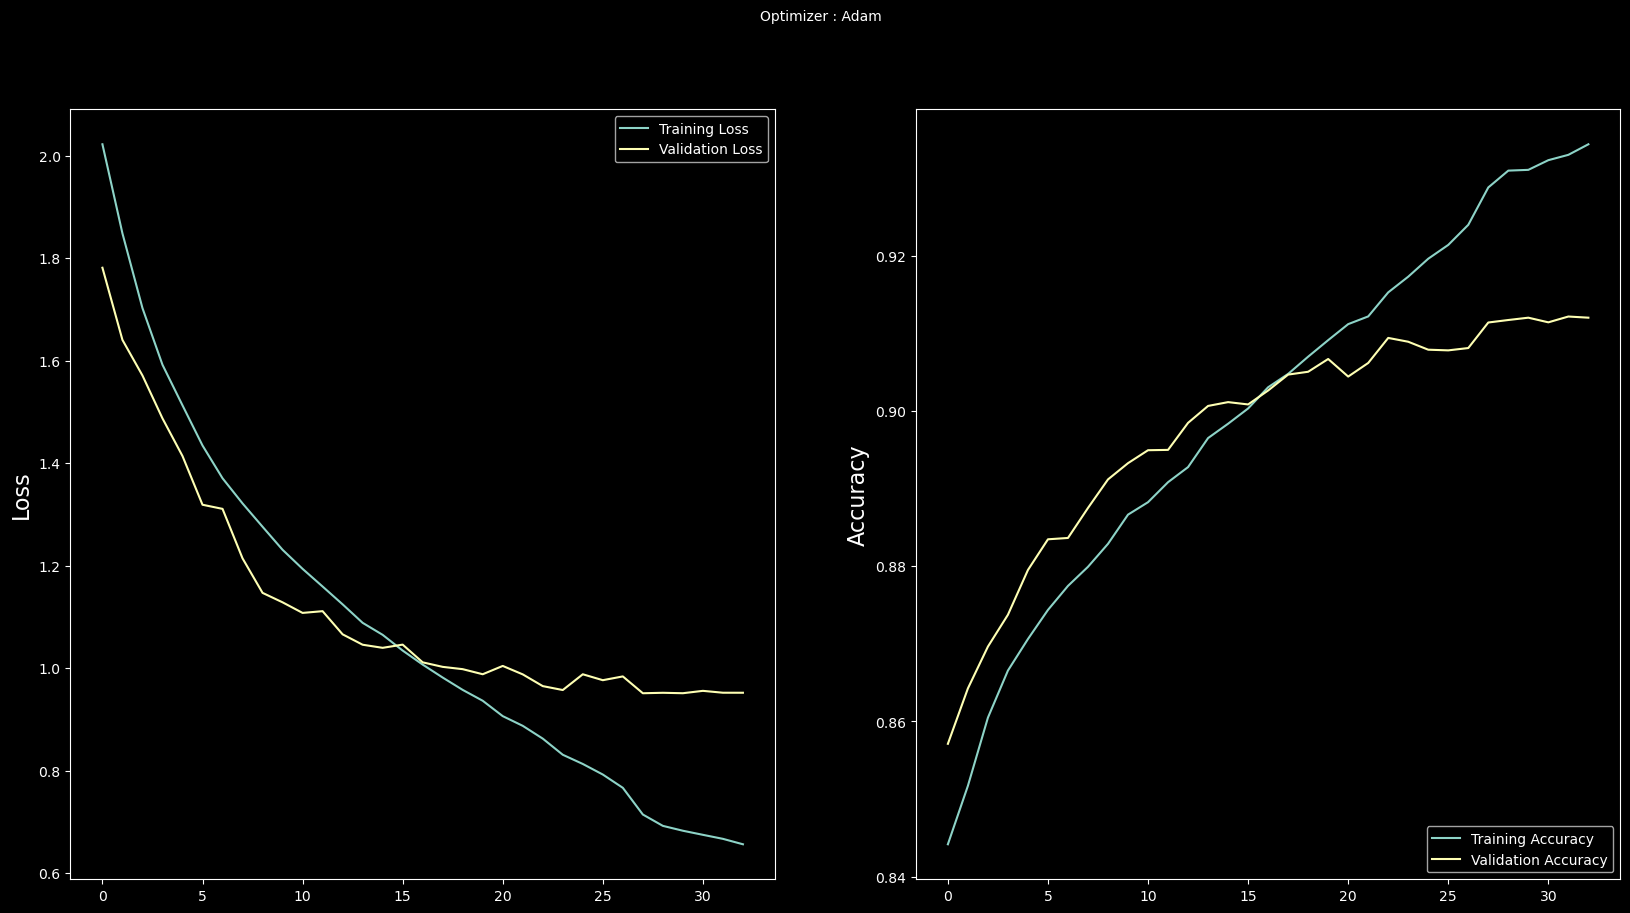

In [18]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

C:\Users\TheLegend\AppData\Local\Temp\ipykernel_16044\2524150371.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generator=val_set)


<Figure size 640x480 with 0 Axes>

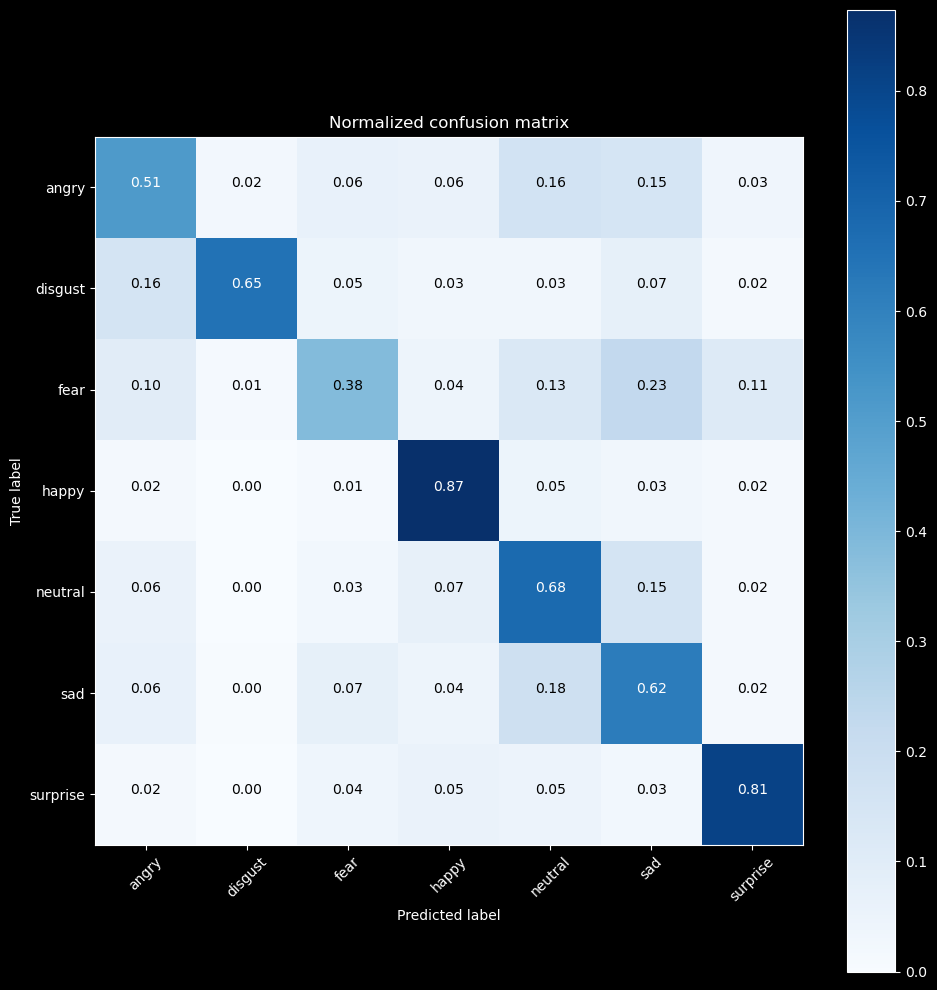

In [19]:
# compute predictions
predictions = model.predict_generator(generator=val_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = val_set.classes
class_names = val_set.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [25]:
model.save('model_final.h5')

In [26]:
from IPython.display import FileLink
FileLink(r'model_final.h5')

C:\Users\TheLegend\Desktop\model_final.h5

In [41]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

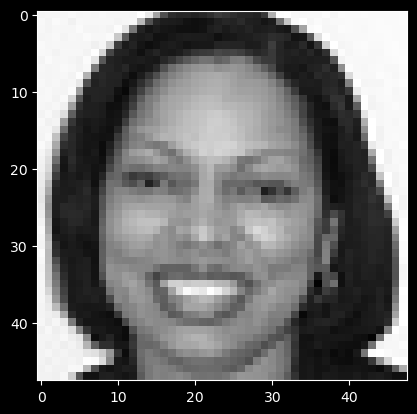

In [50]:
face_image  = cv2.imread("331.jpg")
plt.imshow(face_image)

In [51]:
print(face_image.shape)

(48, 48, 3)


In [52]:
# resizing the image
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

In [53]:
print (face_image.shape)


(1, 48, 48, 1)


In [54]:
from keras.models import load_model

In [55]:
predicted_class = np.argmax(model.predict(face_image))

1/1 [==============================] - 0s 31ms/step


In [56]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [57]:
print(predicted_label)

Happy


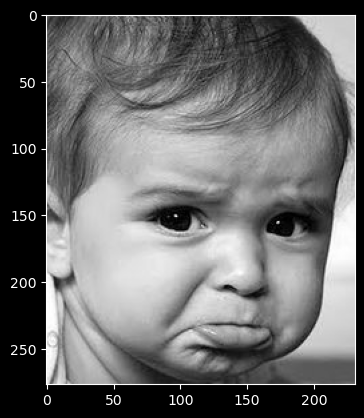

In [187]:
face_image2  = cv2.imread("sad.jpg")
plt.imshow(face_image2)

In [188]:
print(face_image2.shape)

(277, 231, 3)


In [189]:
face_image2 = cv2.resize(face_image2, (48,48))
face_image2 = cv2.cvtColor(face_image2, cv2.COLOR_BGR2GRAY)
face_image2 = np.reshape(face_image2, [1, face_image2.shape[0], face_image2.shape[1], 1])

In [190]:
predicted_class = np.argmax(model.predict(face_image2))

1/1 [==============================] - 0s 58ms/step


In [191]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [192]:
print(predicted_label)

Sad


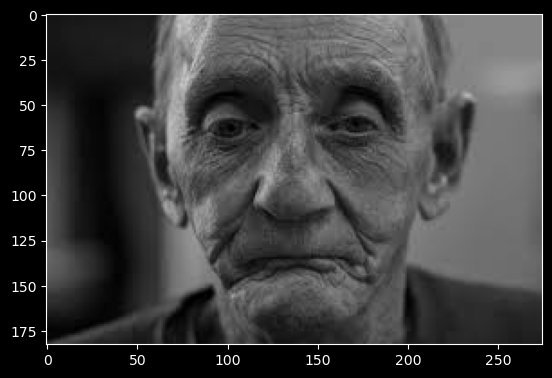

In [129]:
face_image3  = cv2.imread("images (2).jfif")
plt.imshow(face_image3)

In [130]:
print(face_image3.shape)

(183, 275, 3)


In [131]:
face_image3 = cv2.resize(face_image3, (48,48))
face_image3 = cv2.cvtColor(face_image3, cv2.COLOR_BGR2GRAY)
face_image3 = np.reshape(face_image3, [1, face_image3.shape[0], face_image3.shape[1], 1])

In [132]:
predicted_class = np.argmax(model.predict(face_image3))

1/1 [==============================] - 0s 30ms/step


In [133]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [134]:
print(predicted_label)

Sad


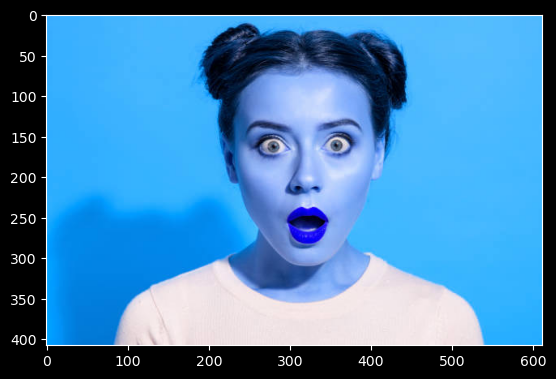

In [156]:
face_image4  = cv2.imread("istock1.jpg")
plt.imshow(face_image4)

In [157]:
print(face_image4.shape)

(408, 612, 3)


In [158]:
face_image4 = cv2.resize(face_image4, (48,48))
face_image4 = cv2.cvtColor(face_image4, cv2.COLOR_BGR2GRAY)
face_image4 = np.reshape(face_image4, [1, face_image4.shape[0], face_image4.shape[1], 1])

In [159]:
predicted_class = np.argmax(model.predict(face_image4))

1/1 [==============================] - 0s 26ms/step


In [160]:
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]

In [161]:
print(predicted_label)

Surprise
